<a href="https://www.kaggle.com/code/jessarmandopealucero/notebook9a7d593008?scriptVersionId=105310827" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df_environment = pd.read_csv("../input/environment-world/environment_mex.csv")
df_environment.columns

Index(['Country Name', 'Country ISO3', 'Year', 'Indicator Name',
       'Indicator Code', 'Value'],
      dtype='object')

In [3]:
# Country Name, Country ISO3 and Indicator Code are unnecessary columns
df_environment.drop(['Country Name', 'Country ISO3', 'Indicator Code'], axis=1, inplace=True)

# Also row 0 is not necessary
df_environment.drop([0], inplace=True)

df_environment


,Year,Indicator Name,Value
1,2018,Agricultural land (% of land area),54.9864965662697
2,2017,Agricultural land (% of land area),55.024048972453
3,2016,Agricultural land (% of land area),54.0096195889812
4,2015,Agricultural land (% of land area),53.0939581779367
5,2014,Agricultural land (% of land area),52.1654363538157
...,...,...,...
3450,2003,People using safely managed sanitation service...,19.98947425
3451,2002,People using safely managed sanitation service...,18.09879201
3452,2001,People using safely managed sanitation service...,17.96506537
3453,2000,People using safely managed sanitation service...,17.82838677


## I want to use the indicator name in different columns

In [4]:
pivot1 = pd.pivot_table(df_environment, index="Year", columns="Indicator Name", values="Value")
pivot1

Indicator Name,Access to clean fuels and technologies for cooking (% of population),"Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)",Access to electricity (% of population),"Adjusted net savings, excluding particulate emission damage (% of GNI)","Adjusted net savings, excluding particulate emission damage (current US$)","Adjusted net savings, including particulate emission damage (% of GNI)","Adjusted net savings, including particulate emission damage (current US$)",Adjusted savings: carbon dioxide damage (% of GNI),Adjusted savings: carbon dioxide damage (current US$),...,Terrestrial protected areas (% of total land area),Total fisheries production (metric tons),Total greenhouse gas emissions (% change from 1990),Total greenhouse gas emissions (kt of CO2 equivalent),Total natural resources rents (% of GDP),Urban land area (sq. km),Urban land area where elevation is below 5 meters (% of total land area),Urban land area where elevation is below 5 meters (sq. km),Urban population living in areas where elevation is below 5 meters (% of total population),"Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)"
Year,,,,,,,,,,,,,,,,,,,,,
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,196513.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,224915.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,220300.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,245600.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,250100.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,84.8,54.7,92.4,100.000000,7.180328,8.114000e+10,6.980319,7.888000e+10,1.562280,1.765000e+10,...,14.500533,1883689.875,NaN,671599.975586,2.491460,NaN,NaN,NaN,NaN,13.981198
2018,84.8,55.9,92.1,99.500000,7.079053,8.424000e+10,6.886388,8.195000e+10,1.554488,1.850000e+10,...,14.500533,1950433.625,NaN,654250.000000,2.972464,NaN,NaN,NaN,NaN,NaN
2019,84.9,57.6,91.7,99.599998,7.586552,9.331000e+10,7.395842,9.097000e+10,1.510898,1.858000e+10,...,14.491590,NaN,NaN,653869.995117,2.238457,NaN,NaN,NaN,NaN,NaN


In [5]:
# I know the number of rows and columns from the previos table, but I can check the number of columns with the next code:
pivot1.shape[1]

129

## Now it's easier to check columns.
Considering that there are 129 columns, I think it's a good idea to select the ones that I want to analyze and create a new dataframe with them.

In [6]:
# Check the name of the columns
pivot1.columns

Index(['Access to clean fuels and technologies for cooking (% of population)',
       'Access to clean fuels and technologies for cooking, rural (% of rural population)',
       'Access to clean fuels and technologies for cooking, urban (% of urban population)',
       'Access to electricity (% of population)',
       'Adjusted net savings, excluding particulate emission damage (% of GNI)',
       'Adjusted net savings, excluding particulate emission damage (current US$)',
       'Adjusted net savings, including particulate emission damage (% of GNI)',
       'Adjusted net savings, including particulate emission damage (current US$)',
       'Adjusted savings: carbon dioxide damage (% of GNI)',
       'Adjusted savings: carbon dioxide damage (current US$)',
       ...
       'Terrestrial protected areas (% of total land area)',
       'Total fisheries production (metric tons)',
       'Total greenhouse gas emissions (% change from 1990)',
       'Total greenhouse gas emissions (kt of C

In [7]:
# There are lots of missing values. Let's count them:

missing_values_count = pivot1.isnull().sum()
missing_values_count

Indicator Name
Access to clean fuels and technologies for cooking (% of population)                                41
Access to clean fuels and technologies for cooking, rural (% of rural population)                   41
Access to clean fuels and technologies for cooking, urban (% of urban population)                   41
Access to electricity (% of population)                                                             33
Adjusted net savings, excluding particulate emission damage (% of GNI)                              20
                                                                                                    ..
Urban land area (sq. km)                                                                            59
Urban land area where elevation is below 5 meters (% of total land area)                            59
Urban land area where elevation is below 5 meters (sq. km)                                          59
Urban population living in areas where elevation is below 

Now I can make a correlation heat map to find interesting relationships between values

### I'll save this code as a template for future uses

    correlations = pd.concat([pivot1["Adjusted savings: net national savings (current US$)"], pivot1["Agricultural land (% of land area)"], pivot1["Aquaculture production (metric tons)"]], axis=1 )
    corrmat = correlations.corr()
    f, ax = plt.subplots(figsize=(20, 9))
    sns.heatmap(corrmat, vmax=.8, square=True)



# Total greenhouse gas emissions (% change from 1990)


In [8]:
hist_ = pivot1['Total greenhouse gas emissions (% change from 1990)']
hist_.dropna()
pivot1['Total greenhouse gas emissions (% change from 1990)'].describe()




count    22.000000
mean     18.663572
std      12.637721
min       0.100095
25%       8.142528
50%      15.782376
75%      30.318425
max      40.103562
Name: Total greenhouse gas emissions (% change from 1990), dtype: float64

<AxesSubplot:ylabel='Frequency'>

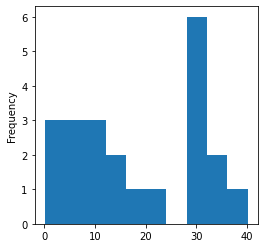

In [9]:
hist_.plot.hist(figsize=(4,4))


<AxesSubplot:xlabel='Year'>

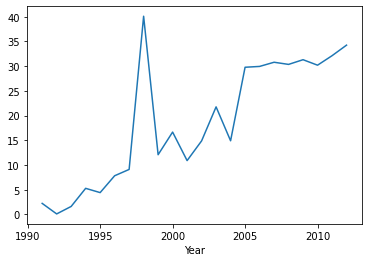

In [10]:
hist_.plot.line()

**What happened between 1995 and 2000?**
